<a href="https://colab.research.google.com/github/jward6301/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [31]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##New York Presbyterian Hospital DataFrame

In [6]:
df = pd.DataFrame
df1 = pd.read_json('https://raw.githubusercontent.com/jward6301/sqlite_database_operations/main/data/133957095_NewYorkPresbyterianHospital_standardcharges.json')
df1

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [18]:
#Checking the size of the df
df1.size
df1.shape

(6193, 47)

In [12]:
#Checking the data types of the df
df1.dtypes

Code (CPT/DRG)                         object
Description                            object
Rev Code                               object
Inpatient/Outpatient                   object
Gross Charges                         float64
Discounted Cash Price                 float64
Aetna                                  object
Cigna                                  object
Empire Blue Cross Blue Shield          object
Emblem Health                          object
United Health Group                    object
Aetna Medicare                         object
AgeWell Medicare                       object
Emblem Medicare                        object
Empire Medicare                        object
Fidelis Medicare                       object
Healthfirst Medicare                   object
UHC Community Plan/United Medicare     object
VNS Medicare                           object
WellCare Medicare                      object
1199                                   object
Affinity Molina Essential         

In [9]:
#identifying missing values and counting them
missing_values = df1.isnull()
print(missing_values)

      Code (CPT/DRG)  Description  Rev Code  Inpatient/Outpatient  \
0              False        False     False                 False   
1              False        False     False                 False   
2              False        False     False                 False   
3              False        False     False                 False   
4              False        False     False                 False   
...              ...          ...       ...                   ...   
6188           False        False     False                 False   
6189           False        False     False                 False   
6190           False        False     False                 False   
6191           False        False     False                 False   
6192           False        False     False                 False   

      Gross Charges  Discounted Cash Price  Aetna  Cigna  \
0             False                  False  False  False   
1             False                  False  False  

In [19]:
#identifying and counting missing values
missing_count = df1.isnull().sum()
print(missing_count)

Code (CPT/DRG)                          0
Description                             0
Rev Code                                0
Inpatient/Outpatient                    0
Gross Charges                           0
Discounted Cash Price                   0
Aetna                                   0
Cigna                                   0
Empire Blue Cross Blue Shield           0
Emblem Health                           0
United Health Group                     0
Aetna Medicare                          0
AgeWell Medicare                        0
Emblem Medicare                         0
Empire Medicare                         0
Fidelis Medicare                        0
Healthfirst Medicare                    0
UHC Community Plan/United Medicare      0
VNS Medicare                            0
WellCare Medicare                       0
1199                                    0
Affinity Molina Essential               0
Affinity Molina Medicaid/CHP            0
Amida Care Medicaid               

In [20]:
#removing duplicate rows
df1.drop_duplicates()
df1

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [21]:
#removing missing values
df1.dropna()
df1

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [22]:
#Replacing unwanted characters in column names such as spaces
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns = df1.columns.str.replace(r'[^a-zA-z0-9]', '')
df1.columns = df1.columns.str.lower()
df1

<ipython-input-22-d1de05ca7dc3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.columns = df1.columns.str.replace(r'[^a-zA-z0-9]', '')


,code_cptdrg,description,rev_code,inpatientoutpatient,gross_charges,discounted_cash_price,aetna,cigna,empire_blue_cross_blue_shield,emblem_health,...,consumer_health_network,devon,equian,first_health,magnacare,multiplanbeechstreetphcs,qhm,worldwide,minimum_negotiated_charge,maximum_negotiated_charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [23]:
#extra line to furhter clean up column names
df1.columns = df1.columns.str.strip()
df1

,code_cptdrg,description,rev_code,inpatientoutpatient,gross_charges,discounted_cash_price,aetna,cigna,empire_blue_cross_blue_shield,emblem_health,...,consumer_health_network,devon,equian,first_health,magnacare,multiplanbeechstreetphcs,qhm,worldwide,minimum_negotiated_charge,maximum_negotiated_charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [26]:
#Printing column names
df1.columns

Index(['code_cptdrg', 'description', 'rev_code', 'inpatientoutpatient',
       'gross_charges', 'discounted_cash_price', 'aetna', 'cigna',
       'empire_blue_cross_blue_shield', 'emblem_health', 'united_health_group',
       'aetna_medicare', 'agewell_medicare', 'emblem_medicare',
       'empire_medicare', 'fidelis_medicare', 'healthfirst_medicare',
       'uhc_community_planunited_medicare', 'vns_medicare',
       'wellcare_medicare', '1199', 'affinity_molina_essential',
       'affinity_molina_medicaidchp', 'amida_care_medicaid',
       'emblem_medicaidchp', 'empire_healthplus_essential',
       'empire_healthplus_exchange', 'empire_healthplus_medicaidchp',
       'fidelis_essentialexchange', 'fidelis_medicaidchp',
       'healthfirst_essentialexchange', 'healthfirst_medicaidchp',
       'mvp_medicaidchp', 'mvp_essential', 'united_community_plan_essential',
       'united_community_plan_medicaid', 'vns_medicaid',
       'consumer_health_network', 'devon', 'equian', 'first_health',
 

In [25]:
#descriptive statistics
df1.describe()

,gross_charges,discounted_cash_price,minimum_negotiated_charge,maximum_negotiated_charge
count,6.193000e+03,6.193000e+03,5912.000000,5.912000e+03
mean,3.385988e+04,3.385988e+04,2249.918880,2.390277e+04
std,1.062409e+05,1.062409e+05,6015.717204,7.136503e+04
min,1.000000e+00,1.000000e+00,0.454400,1.608000e+00
25%,5.970000e+02,5.970000e+02,122.228437,6.380010e+02
50%,3.925000e+03,3.925000e+03,431.142905,4.086731e+03
75%,3.033600e+04,3.033600e+04,2107.000000,1.925640e+04
max,2.538980e+06,2.538980e+06,204861.126000,1.713460e+06


In [27]:
#categorical descriptives
category_counts = df1['inpatientoutpatient'].value_counts()
print(category_counts)

Inpatient/Outpatient    5470
Inpatient                723
Name: inpatientoutpatient, dtype: int64


In [28]:
#categorical descritpives in another format
categorical_columns = df1.select_dtypes(include=['object']).columns
frequency_counts = {}
for column in categorical_columns:
    counts = df1[column].value_counts()
    frequency_counts[column] = counts
for column, counts in frequency_counts.items():
    print(f"Frequency counts for '{column}':")
    print(counts)
    print()

Frequency counts for 'code_cptdrg':
96360    1
D0705    1
D0431    1
D0425    1
D0423    1
        ..
29874    1
29873    1
29871    1
29870    1
989      1
Name: code_cptdrg, Length: 6193, dtype: int64

Frequency counts for 'description':
KNEE ARTHROSCOPY/SURGERY                                                         16
REPAIR EYELID DEFECT                                                             12
CYSTOSCOPY AND TREATMENT                                                         12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
AMPUTATION TOE METATARSAL                                                         1
AMPUTATION THRU METATARSAL                                                        1
AMPUTATION OF MIDFOOT                                                             1
REVI

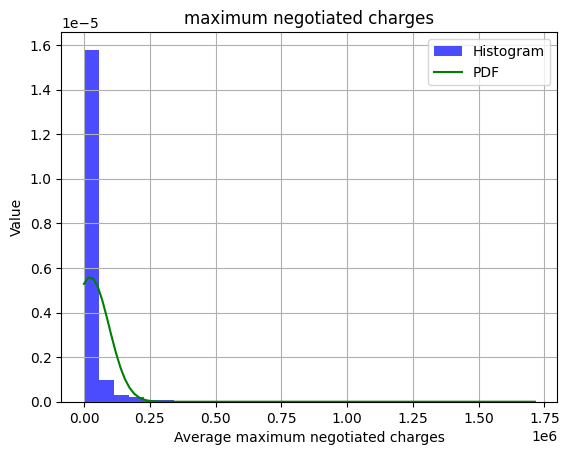

In [32]:
# histogram for Presbyterian for maximum negotiated charges

mean = 23902.774242828367
std_dev = 71365.02839895811
num_samples = 1000


plt.hist(df1['maximum_negotiated_charge'], bins=30, density=True, alpha=0.7, color='blue', label='Histogram')


x = np.linspace(min(df1['maximum_negotiated_charge']), max(df1['maximum_negotiated_charge']), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='green', label='PDF')

plt.title('maximum negotiated charges')
plt.xlabel('Average maximum negotiated charges')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


##Stonybrook Hospital DataFrame

In [33]:
df = pd.DataFrame
df2 = pd.read_csv('https://raw.githubusercontent.com/jward6301/sqlite_database_operations/main/data/stonybrook.csv')
df2

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Checking the size of the df
df2.size
df2.shape

(7710, 57)

In [35]:
#Cehcking the data types of the df
df2.dtypes

Code                                             object
Description                                      object
Type                                             object
Package/Line_Level                               object
Gross charge                                    float64
Discounted cash price                           float64
De-identified min contracted rate               float64
De-identified max contracted rate               float64
Derived contracted rate                         float64
1199-Commercial other                           float64
Aetna-Medicare Advantage HMO                    float64
Aetna-Commercial HMO/POS                        float64
Aetna-Commercial PPO/Open Access                float64
Aetna-Commercial other                          float64
Empire Health-Commercial other                  float64
Empire Health-Commercial PPO/Open Access        float64
BlueCross BlueShield-Commercial other           float64
Beacon Health-Commercial other                  

In [36]:
#identifying missing values and counting them
missing_values = df2.isnull()
print(missing_values)

       Code  Description   Type  Package/Line_Level  Gross charge  \
0     False        False  False               False         False   
1     False        False  False               False         False   
2     False        False  False               False         False   
3     False        False  False               False         False   
4     False        False  False               False         False   
...     ...          ...    ...                 ...           ...   
7705  False        False   True                True         False   
7706  False        False   True                True         False   
7707  False        False   True                True         False   
7708  False        False   True                True         False   
7709  False        False   True                True         False   

      Discounted cash price  De-identified min contracted rate  \
0                     False                              False   
1                     False            

In [37]:
#identifying and counting missing values
missing_count = df2.isnull().sum()
print(missing_count)

Code                                               0
Description                                        0
Type                                             783
Package/Line_Level                               783
Gross charge                                       0
Discounted cash price                              0
De-identified min contracted rate               1456
De-identified max contracted rate               1456
Derived contracted rate                         1456
1199-Commercial other                           6696
Aetna-Medicare Advantage HMO                    6604
Aetna-Commercial HMO/POS                        5883
Aetna-Commercial PPO/Open Access                6098
Aetna-Commercial other                          7582
Empire Health-Commercial other                  4650
Empire Health-Commercial PPO/Open Access        5308
BlueCross BlueShield-Commercial other           6456
Beacon Health-Commercial other                  7707
Carelon Health-Commercial other               

In [38]:
#removing duplicate rows
df2.drop_duplicates()
df2

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#removing missing values
df2.dropna()
df2

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Replacing unwanted characters in column names such as spaces
df2.columns = df2.columns.str.replace(' ', '_')
df2.columns = df2.columns.str.replace(r'[^a-zA-z0-9]', '')
df2.columns = df2.columns.str.lower()
df2

<ipython-input-40-9e0e6b3dc7a8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.columns = df2.columns.str.replace(r'[^a-zA-z0-9]', '')


,code,description,type,packageline_level,gross_charge,discounted_cash_price,deidentified_min_contracted_rate,deidentified_max_contracted_rate,derived_contracted_rate,1199commercial_other,...,optumcommercial_other,oxfordcommercial_other,oxfordcommercial_hmopos,tricarecommercial_other,united_healthcarecommercial_other,united_healthcaremedicare_advantage_hmo,united_healthcarecommercial_hmopos,united_healthcaremedicaid_hmo,united_healthcarecommercial_ppoopen_access,veteran_familycommercial_other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#extra line to furhter clean up column names
df2.columns = df2.columns.str.strip()
df2

,code,description,type,packageline_level,gross_charge,discounted_cash_price,deidentified_min_contracted_rate,deidentified_max_contracted_rate,derived_contracted_rate,1199commercial_other,...,optumcommercial_other,oxfordcommercial_other,oxfordcommercial_hmopos,tricarecommercial_other,united_healthcarecommercial_other,united_healthcaremedicare_advantage_hmo,united_healthcarecommercial_hmopos,united_healthcaremedicaid_hmo,united_healthcarecommercial_ppoopen_access,veteran_familycommercial_other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Printing column names
df2.columns

Index(['code', 'description', 'type', 'packageline_level', 'gross_charge',
       'discounted_cash_price', 'deidentified_min_contracted_rate',
       'deidentified_max_contracted_rate', 'derived_contracted_rate',
       '1199commercial_other', 'aetnamedicare_advantage_hmo',
       'aetnacommercial_hmopos', 'aetnacommercial_ppoopen_access',
       'aetnacommercial_other', 'empire_healthcommercial_other',
       'empire_healthcommercial_ppoopen_access',
       'bluecross_blueshieldcommercial_other', 'beacon_healthcommercial_other',
       'carelon_healthcommercial_other', 'cignacommercial_ppoopen_access',
       'cignacommercial_other', 'cignacommercial_hmopos',
       'eh_facetcommercial_other', 'emblemhealthcommercial_ppoopen_access',
       'emblemhealthcommercial_other', 'emblemhealthcommercial_hmopos',
       'emblemhealthmedicaid_hmo', 'emblemhealthmedicare_advantage_hmo',
       'empire_healthcommercial_hmopos', 'empire_healthmedicare_advantage_hmo',
       'empire_healthmedicaid_

In [43]:
#descriptive statistics
df2.describe()

,gross_charge,discounted_cash_price,deidentified_min_contracted_rate,deidentified_max_contracted_rate,derived_contracted_rate,1199commercial_other,aetnamedicare_advantage_hmo,aetnacommercial_hmopos,aetnacommercial_ppoopen_access,aetnacommercial_other,...,optumcommercial_other,oxfordcommercial_other,oxfordcommercial_hmopos,tricarecommercial_other,united_healthcarecommercial_other,united_healthcaremedicare_advantage_hmo,united_healthcarecommercial_hmopos,united_healthcaremedicaid_hmo,united_healthcarecommercial_ppoopen_access,veteran_familycommercial_other
count,7.710000e+03,7.710000e+03,6254.000000,6.254000e+03,6254.000000,1014.000000,1106.000000,1827.000000,1612.000000,128.000000,...,943.000000,1777.000000,0.0,434.000000,2357.000000,624.000000,133.000000,2065.000000,357.000000,46.000000
mean,2.274832e+04,2.274832e+04,4090.693876,1.003579e+04,6315.587725,5791.542456,5614.005027,4320.418248,4436.188381,1703.756250,...,10868.205705,2572.653849,NaN,2070.212120,5977.464298,4438.776234,3261.594586,2454.314228,789.416667,702.261087
std,7.470570e+04,7.470570e+04,10576.213503,2.915075e+04,14601.846406,24302.352403,12671.487487,8718.537182,8881.733882,5124.232802,...,20703.429246,4036.667401,NaN,8501.228677,16227.981498,9982.579323,10266.478193,11009.140577,2880.486830,1717.006016
min,3.000000e-02,3.000000e-02,0.010000,1.000000e-01,0.030000,0.010000,1.100000,0.020000,0.500000,0.590000,...,2.370000,0.010000,NaN,1.000000,0.010000,1.330000,0.190000,0.010000,0.180000,2.480000
25%,1.065895e+03,1.065895e+03,96.520000,6.982500e+02,403.117500,148.797500,125.070000,277.900000,312.750000,110.387500,...,200.450000,197.880000,NaN,71.220000,258.500000,96.290000,129.000000,42.980000,8.400000,26.810000
50%,4.745295e+03,4.745295e+03,1108.860000,4.311000e+03,2600.740000,974.400000,714.860000,2153.000000,2153.000000,404.500000,...,1700.200000,1932.380000,NaN,236.230000,1571.000000,387.500000,444.000000,425.790000,34.830000,82.710000
75%,1.103881e+04,1.103881e+04,4309.532500,8.170000e+03,5870.540000,4592.000000,5782.430000,4822.000000,4822.000000,1778.920000,...,13359.895000,4704.000000,NaN,1486.947500,5127.000000,3531.920000,2257.430000,1753.100000,286.800000,235.000000
max,1.857952e+06,1.857952e+06,327869.690000,1.302636e+06,370099.900000,331304.280000,157848.600000,99999.990000,96372.570000,54838.130000,...,277267.380000,80891.260000,NaN,154940.610000,291490.750000,92493.910000,88051.340000,327869.690000,26350.000000,7195.400000


In [44]:
#categorical descritpives
categorical_columns = df1.select_dtypes(include=['object']).columns
frequency_counts = {}
for column in categorical_columns:
    counts = df1[column].value_counts()
    frequency_counts[column] = counts
for column, counts in frequency_counts.items():
    print(f"Frequency counts for '{column}':")
    print(counts)
    print()

Frequency counts for 'code_cptdrg':
96360    1
D0705    1
D0431    1
D0425    1
D0423    1
        ..
29874    1
29873    1
29871    1
29870    1
989      1
Name: code_cptdrg, Length: 6193, dtype: int64

Frequency counts for 'description':
KNEE ARTHROSCOPY/SURGERY                                                         16
REPAIR EYELID DEFECT                                                             12
CYSTOSCOPY AND TREATMENT                                                         12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
AMPUTATION TOE METATARSAL                                                         1
AMPUTATION THRU METATARSAL                                                        1
AMPUTATION OF MIDFOOT                                                             1
REVI

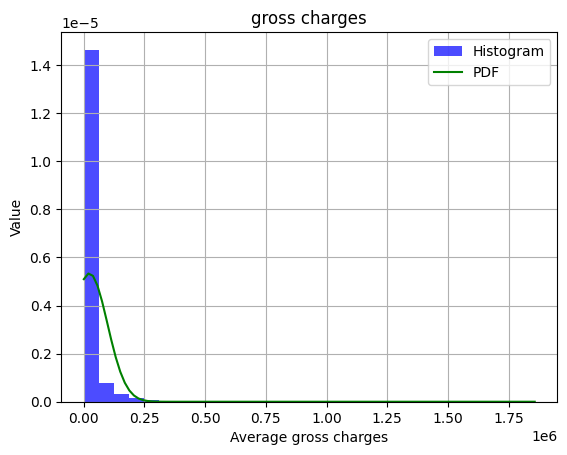

In [46]:
# histogram for Stonybrook for maximum gross charges

mean = 22748.319448767834
std_dev = 74705.70326611007
num_samples = 1000


plt.hist(df2['gross_charge'], bins=30, density=True, alpha=0.7, color='blue', label='Histogram')


x = np.linspace(min(df2['gross_charge']), max(df2['gross_charge']), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='green', label='PDF')

plt.title('gross charges')
plt.xlabel('Average gross charges')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#SQLite Database Operations

In [51]:
# Creating the local database
conn = sqlite3.connect('health.db')
c = conn.cursor()

In [58]:
# Creating the new table and calling it stonybrookh_systems
c.execute("""
            CREATE TABLE stonybrookh_system
                (
                    hospital_name text,
                    insurance_type text,
                    code text,
                    code_description text,
                    cost_negotiated real,
                    cost_minimum real,
                    cost_maximum real
                );
          """)

conn.commit()

In [59]:
#Confirming that the table was created properly
c.execute('''
  SELECT name
  FROM sqlite_master
  WHERE type='table';
  ''')

c.fetchall()

[('stonybrook_system',),
 ('sbhsystem',),
 ('sbh_system',),
 ('sbh_systems',),
 ('stonybrookh_system',)]

In [68]:
#Creating new rows
sql_query = """

INSERT INTO stonybrookh_system (
  'hospital_name',
  'insurance_type',
  'code',
  'code_description',
  'cost_negotiated',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'east long island',
    'GHI',
    '36482643',
    'charge for blood draw in-hospital',
    115,
    105,
    1115
  );

"""

print(sql_query)



INSERT INTO stonybrookh_system (
  'hospital_name',
  'insurance_type',
  'code',
  'code_description',
  'cost_negotiated',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'east long island',
    'GHI',
    '36482643',
    'charge for blood draw in-hospital',
    115,
    105,
    1115
  );




In [69]:
#Inserting the new rows into the table
c.execute(sql_query)
conn.commit()

In [71]:
#confirming the information was correctly stored in the table
sql_query_2 = """
select *
from stonybrookh_system;
"""

c.execute(sql_query_2)
print(c.fetchall())

[('east long island', 'GHI', '36482643', 'charge for blood draw in-hospital', 115.0, 105.0, 1115.0)]


In [72]:
# Create an engine to connect to SQLite db

engine = create_engine('sqlite:///health.db')

In [74]:
pd.read_sql_query("select * from stonybrookh_system;", conn)

,hospital_name,insurance_type,code,code_description,cost_negotiated,cost_minimum,cost_maximum
0,east long island,GHI,36482643,charge for blood draw in-hospital,115.0,105.0,1115.0


In [76]:
#Replace the data with the real Stonybrook hospital data

df2.to_sql('stonybrookh_system', conn, if_exists='replace')

new_query = """
SELECT *
FROM stonybrookh_system
limit 50;
"""

response = pd.read_sql(new_query, conn)
response

,index,code,description,type,packageline_level,gross_charge,discounted_cash_price,deidentified_min_contracted_rate,deidentified_max_contracted_rate,derived_contracted_rate,...,optumcommercial_other,oxfordcommercial_other,oxfordcommercial_hmopos,tricarecommercial_other,united_healthcarecommercial_other,united_healthcaremedicare_advantage_hmo,united_healthcarecommercial_hmopos,united_healthcaremedicaid_hmo,united_healthcarecommercial_ppoopen_access,veteran_familycommercial_other
0,0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
1,1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,...,NaN,4782.00,None,NaN,3845.25,NaN,None,658.94,None,None
2,2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,...,NaN,4782.00,None,NaN,3845.25,NaN,None,658.94,None,None
3,3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
4,4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,...,NaN,NaN,None,NaN,5127.00,NaN,None,NaN,None,None
5,5,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Package,2823.01,2823.01,446.28,6017.59,4219.31,...,NaN,NaN,None,NaN,5127.00,NaN,None,NaN,None,None
6,6,10010,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,588.00,588.00,2155.50,2155.50,2155.50,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
7,7,10021,"FINE NEEDLE ASPIRATION BIOPSY, FIRST GROWTH",Outpatient,Line,1566.78,1566.78,275.46,2265.50,1270.48,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
8,8,10021,"FINE NEEDLE ASPIRATION BIOPSY, FIRST GROWTH",Outpatient,Package,1566.78,1566.78,275.46,2265.50,1270.48,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
9,9,10030,DRAINAGE OF FLUID COLLECTION IN SOFT TISSUE US...,Outpatient,Line,2082.05,2082.05,152.66,4101.00,1663.85,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
